In [29]:
# you may, or not, need the following imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
# import torchvision
from PIL import Image

# Homework 1 - Intro

In [30]:
# Helper functions, just execute and ignore
image_link = "https://i.etsystatic.com/16952472/r/il/bf0677/1530154159/il_fullxfull.1530154159_97sx.jpg"

def download_image(image_link: str) -> str:
    # Download the image and save it locally as a .jpg file
    response = requests.get(image_link)
    local_filename = "downloaded_image.jpg"
    with open(local_filename, "wb") as f:
        f.write(response.content)
    return local_filename


## Exercise 1
Use OpenCV/Numpy/PyTorch to load and image. Then split the image into its RGB channels. Display the channels using matplotlib.

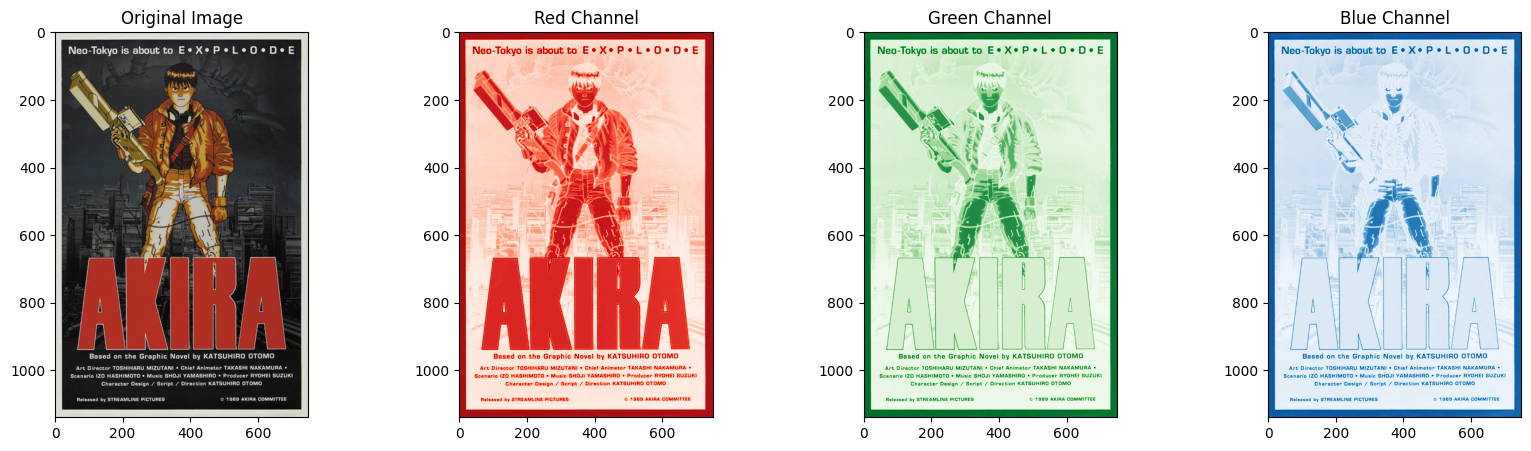

In [31]:
def exercise_1(image_path: str):
    """
    1. `image_path` is a string that contains the path to the image file.
    2. Read the image file into memory (I recommend using OpenCV or Matplotlib)
    3. Split the image into its RGB channels (be careful about the order of the channels, matplotlib and OpenCV use different channel ordering)
    4. Display the channels using matplotlib
    """
    
    
    
    image = None # the original image
    r, g, b = None, None, None # the RGB channels
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    r = image[:,:,0]
    g = image[:,:,1] 
    b = image[:,:,2]

    # Display the original image and its channels
    plt.figure(figsize=(20, 5))
    plt.subplot(141)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(142)
    plt.imshow(r, cmap="Reds")
    plt.title("Red Channel")

    plt.subplot(143)
    plt.imshow(g, cmap="Greens")
    plt.title("Green Channel")

    plt.subplot(144)
    plt.imshow(b, cmap="Blues")
    plt.title("Blue Channel")
    plt.show()


exercise_1(download_image(image_link))

## Exercise 2
Calculate the size of the image in memory. 
Print:
- the image size on disk (in KB)
- the image size in memory (in KB)
- the image dimensions
- the image data type (float16/float32/uint8/etc.)
- the device that the image is located on (GPU/CPU/MPS)
Comment on the difference between the image size on disk and the image size in memory. 

In [32]:
def exercise_2(image_path: str):
    """
    1. `image_path` is a string that contains the path to the image file.
    2. Read the image file into memory (
        I recommend using using torchvision or PIL:
        torchvision.io.read_image(...) or Image.open(...)
        )
    3. Calculate and print:
        - the image size on disk
        - the image size in memory (will be larger then on disk, why? :))
        - the image dimensions (aka shape i.e. channels, width, height)
        - the image data type (float16/float32/etc.)
        - the device that the image is located on (GPU/CPU)

    """
    image = Image.open(image_path)
    
    file_size = None
    size_in_memory = None
    shape = None
    device = None
    
    file_size = round(os.path.getsize(image_path) / 1024, 2) # Is compressed
    size_in_memory = round(image.size[0] * image.size[1] * 3 / 1024, 2) # Is uncompressed. Width * height * 3 channels
    shape = image.size
    device = "CPU"
    
    # Print information
    print(f"File size on disk: {file_size} KB")
    print(f"Image size in memory: {size_in_memory} KB")
    print(f"Image dimensions: {shape}")
    print(f"Device: {device}")

    # Image size in memory is larger than on disk because it is uncompressed. When we save the image, we save the compressed version, which is smaller.
    # Each pixel is 3 bytes (RGB). In other colorspaces, each pixel could be 1 byte (grayscale) or 4 bytes (RGBA). It depends on the colorspace.


# Call the function
exercise_2(download_image(image_link))

File size on disk: 108.6 KB
Image size in memory: 2502.69 KB
Image dimensions: (750, 1139)
Device: CPU


## Exercise 3
Simple OpenCV image processing.
Read the image, convert it to grayscale, then convert the 50% brightest pixels to white and the 50% darkest pixels to black. Finally, display the image

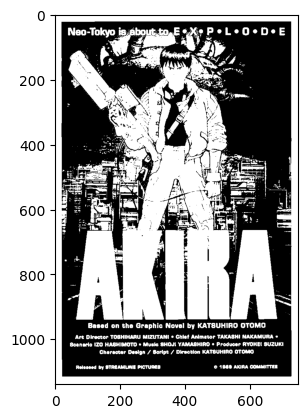

In [39]:
def exercise_3(image_path):
    """
    1. Read the image
    2. Convert it to grayscale (one-channel image)
    3. Convert the 50% brightest pixels to white and the 50% darkest pixels to black.
    4. Display the image
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
		# For calculating the threshold, I used the median value of the image.
    threshold = np.median(image)
    _, image_processed = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    
    plt.imshow(image_processed, cmap="gray")
    plt.show()


exercise_3(download_image(image_link))